In [0]:
NAME = "Binil Kuriachan"

# **Importing Libraries**

In [2]:
## import packages

import torch
import random
import os
import numpy as np
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as dset

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'



## Checks for the availability of GPU 
if torch.cuda.is_available():
    print("working on gpu!")
    device = 'cuda'
else:
    print("No gpu! only cpu ;)")
    device = 'cpu'
 

if device == 'cpu':    
    random.seed(0)
    np.random.seed(0)
    torch.manual_seed(0)
elif device == 'cuda':
    random.seed(0)
    np.random.seed(0)
    torch.manual_seed(0)
    torch.cuda.manual_seed_all(0)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    os.environ['PYTHONHASHSEED'] = '0'

############################################################################### 

working on gpu!


Downloading CIFAR dataset and applying transformation

In [3]:
import torchvision
import torchvision.transforms as transforms
import os

if not os.path.isdir('./data'):
    os.mkdir('./data')
root = './data/'

train_bs = 64
test_bs = 64
num_epochs = 50

transform = transforms.Compose([transforms.Grayscale(num_output_channels=1),
                                transforms.ToTensor(),
         transforms.Normalize(mean=[0.5],std=[0.5])
        ])
training_data=torchvision.datasets.CIFAR10(root, train=True, transform=transform,  download=True)
testing_data = torchvision.datasets.CIFAR10(root, train=False, transform=transform,download=True)

train_loader=torch.utils.data.DataLoader(dataset=training_data, batch_size=train_bs, shuffle=True, drop_last=True)
test_loader = torch.utils.data.DataLoader(testing_data, batch_size=test_bs, drop_last=False)

0it [00:00, ?it/s]

 99%|█████████▉| 168706048/170498071 [00:12<00:00, 16789148.70it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data/
Files already downloaded and verified


# **Function to take n images from each category and convert to pytorch dataloader**

In [0]:
import torch
import numpy as np
import torch.utils.data as utils
def image_subset(train_loader,n=10,batch_size = 64):
  image_counter ={0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}
  x = []
  y = []
  for (images,labels)  in train_loader:    
    if np.min(list(image_counter.values())) < n:    
      for i in range(64):
        if image_counter[labels.data.numpy()[i]]<n:
          x.append(images[i])
          y.append(labels[i])
          image_counter[labels.data.numpy()[i]] += 1
    else:
      print(image_counter)
      break
  tensor_x = torch.stack([i for i in x])
  tensor_y = torch.stack([i for i in y])
  my_dataset = utils.TensorDataset(tensor_x,tensor_y)
  data_loader=torch.utils.data.DataLoader(dataset=my_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
  return data_loader

  


In [7]:
image_data_loader_10 = image_subset(train_loader,n=10,batch_size = 64)
image_data_loader_100 = image_subset(train_loader,n=100,batch_size = 64)


{0: 10, 1: 10, 2: 10, 3: 10, 4: 10, 5: 10, 6: 10, 7: 10, 8: 10, 9: 10}
{0: 100, 1: 100, 2: 100, 3: 100, 4: 100, 5: 100, 6: 100, 7: 100, 8: 100, 9: 100}


torch.Size([64, 1, 32, 32])


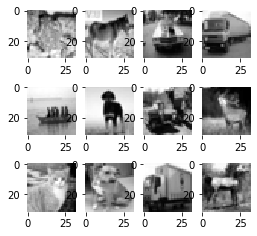

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

## get a batch of data
images, labels = iter(train_loader).next()

fig = plt.figure(figsize=(4,4))

print(images.size())

for i in np.arange(1, 13):
    ax = fig.add_subplot(3,4,i, frameon=False)
    img = images[i][0]
    # print(img.shape)
    # ax.set_title(image_dict[labels[i].item()])
    plt.imshow(img)



# **Create 3 Autoencoders for layer 1, 2 and 3**

In [0]:
class AutoEncoder1(nn.Module):
  def __init__(self):
      super(AutoEncoder1,self).__init__()
      
      self.encoder = nn.Sequential(
          nn.Linear(1024, 1000),
          nn.ReLU(inplace=True)
      )

      self.decoder = nn.Sequential(
          nn.Linear(1000, 1024),
          nn.Tanh()
      )
  
  def forward(self, x):
      x = self.encoder(x)
      x = self.decoder(x)
      return x
  
  def encoder1(self, x):
      x = self.encoder(x)
      return(x)



In [0]:
class AutoEncoder2(nn.Module):
    def __init__(self):
        super(AutoEncoder2,self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(1000, 800),
            nn.ReLU(inplace=True)
        )

        self.decoder = nn.Sequential(
            nn.Linear(800, 1000),
            nn.Tanh()
        )
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
    
    def encoder2(self, x):
        x = self.encoder(x)
        return(x)

In [0]:
class AutoEncoder3(nn.Module):
  def __init__(self):
    super(AutoEncoder3,self).__init__()

    self.encoder = nn.Sequential(
        nn.Linear(800, 500),
        nn.ReLU(inplace=True)
    )

    self.decoder = nn.Sequential(
        nn.Linear(500, 800),
        nn.Tanh()
    )
    
  def forward(self, x):
  
    x = self.encoder(x)
    x = self.decoder(x)
    return x

  def encoder3(self, x):
    x = self.encoder(x)
    return(x)

# **Classifier with 2 layers**

In [0]:
class Classifier(nn.Module):
  def __init__(self):
    super(Classifier,self).__init__()

    self.classifier = nn.Sequential(
            nn.Linear(500, 100),
            nn.ReLU(),
            nn.Linear(100, 10)            
        )
    
  def forward(self, x):  
    x = self.classifier(x)
    return x


Classifier with 1 Layer

In [0]:
class ClassifierSingleLayer(nn.Module):
  def __init__(self):
    super(ClassifierSingleLayer,self).__init__()

    self.classifier = nn.Sequential(
            nn.Linear(500, 10)          
        )
    
  def forward(self, x):  
    x = self.classifier(x)
    return x

#Train Autoencoder 1

In [0]:
model1 = AutoEncoder1()
model1 = model1.to(device)
distance = nn.MSELoss()
optimizer = torch.optim.Adam(model1.parameters(),weight_decay=1e-5, lr = 0.001)

In [15]:
model1_loss = []
for epoch in range(100):
  for (images,labels)  in train_loader:
    model1.train()
    # images = Variable(images)
    images = images.view(images.size(0), 1024)
    images = images.to(device)
    labels = labels.to(device)
    # print(images.shape)
    outputs = model1(images)
    loss = distance(outputs, images)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # batch_loss += loss.item()
  model1_loss.append(loss.item())
  
  # ===================log========================
  print('epoch [{}/{}], loss:{:.4f}'.format(epoch+1, 100, loss.item()))

epoch [1/100], loss:0.0122
epoch [2/100], loss:0.0083
epoch [3/100], loss:0.0072
epoch [4/100], loss:0.0068
epoch [5/100], loss:0.0070
epoch [6/100], loss:0.0068
epoch [7/100], loss:0.0060
epoch [8/100], loss:0.0058
epoch [9/100], loss:0.0058
epoch [10/100], loss:0.0059
epoch [11/100], loss:0.0055
epoch [12/100], loss:0.0067
epoch [13/100], loss:0.0054
epoch [14/100], loss:0.0054
epoch [15/100], loss:0.0055
epoch [16/100], loss:0.0060
epoch [17/100], loss:0.0063
epoch [18/100], loss:0.0063
epoch [19/100], loss:0.0068
epoch [20/100], loss:0.0059
epoch [21/100], loss:0.0056
epoch [22/100], loss:0.0068
epoch [23/100], loss:0.0064
epoch [24/100], loss:0.0064
epoch [25/100], loss:0.0063
epoch [26/100], loss:0.0064
epoch [27/100], loss:0.0064
epoch [28/100], loss:0.0055
epoch [29/100], loss:0.0055
epoch [30/100], loss:0.0050
epoch [31/100], loss:0.0064
epoch [32/100], loss:0.0057
epoch [33/100], loss:0.0058
epoch [34/100], loss:0.0059
epoch [35/100], loss:0.0060
epoch [36/100], loss:0.0054
e

# Plot loss of Autoencoder 1

Text(0.5, 1.0, 'Loss: Autoencoder 1')

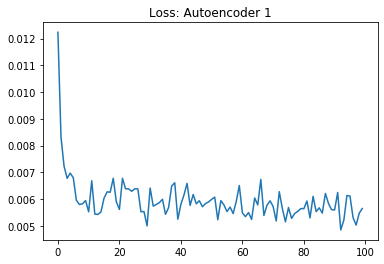

In [16]:
plt.plot(model1_loss)
plt.title("Loss: Autoencoder 1")

# Train Autoencoder 2

In [0]:
model2 = AutoEncoder2()
model2 = model2.to(device)
distance = nn.MSELoss()
optimizer = torch.optim.Adam(model2.parameters(),weight_decay=1e-5, lr = 0.0001)

In [18]:
model2_loss = []
for epoch in range(100):
  for (images,labels)  in train_loader:
    model1.eval()
    model2.train()
    # images = Variable(images)
    images = images.view(images.size(0), 1024)
    images = images.to(device)
    labels = labels.to(device)
    images = model1.encoder1(images)
    # print(images.shape)
    outputs = model2(images)
    loss = distance(outputs, images)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  model2_loss.append(loss.item())
  # ===================log========================
  print('epoch [{}/{}], loss:{:.4f}'.format(epoch+1, 100, loss.item()))

epoch [1/100], loss:0.1009
epoch [2/100], loss:0.1147
epoch [3/100], loss:0.1075
epoch [4/100], loss:0.0831
epoch [5/100], loss:0.0896
epoch [6/100], loss:0.1049
epoch [7/100], loss:0.0867
epoch [8/100], loss:0.0905
epoch [9/100], loss:0.0986
epoch [10/100], loss:0.1041
epoch [11/100], loss:0.0920
epoch [12/100], loss:0.0758
epoch [13/100], loss:0.0989
epoch [14/100], loss:0.0862
epoch [15/100], loss:0.0796
epoch [16/100], loss:0.0865
epoch [17/100], loss:0.0839
epoch [18/100], loss:0.0938
epoch [19/100], loss:0.0873
epoch [20/100], loss:0.0804
epoch [21/100], loss:0.0800
epoch [22/100], loss:0.0955
epoch [23/100], loss:0.0978
epoch [24/100], loss:0.0674
epoch [25/100], loss:0.0796
epoch [26/100], loss:0.0812
epoch [27/100], loss:0.0915
epoch [28/100], loss:0.0783
epoch [29/100], loss:0.0882
epoch [30/100], loss:0.0794
epoch [31/100], loss:0.0936
epoch [32/100], loss:0.0888
epoch [33/100], loss:0.0836
epoch [34/100], loss:0.0968
epoch [35/100], loss:0.0795
epoch [36/100], loss:0.0926
e

In [0]:
model3 = AutoEncoder3()
model3 = model3.to(device)
distance = nn.MSELoss()
optimizer = torch.optim.Adam(model3.parameters(),weight_decay=1e-5, lr = 0.001)

In [20]:
model3_loss = []
for epoch in range(100):
  for (images,labels)  in train_loader:
    model1.eval()
    model2.eval()
    model3.train()
    images = images.view(images.size(0), 1024)
    images = images.to(device)
    labels = labels.to(device)
    images = model1.encoder1(images)
    images = model2.encoder2(images)
    outputs = model3(images)
    loss = distance(outputs, images)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  model3_loss.append(loss.item())
  # ===================log========================
  print('epoch [{}/{}], loss:{:.4f}'.format(epoch+1, 100, loss.item()))

epoch [1/100], loss:0.2269
epoch [2/100], loss:0.2251
epoch [3/100], loss:0.2176
epoch [4/100], loss:0.1983
epoch [5/100], loss:0.2190
epoch [6/100], loss:0.1785
epoch [7/100], loss:0.2046
epoch [8/100], loss:0.2234
epoch [9/100], loss:0.1753
epoch [10/100], loss:0.1963
epoch [11/100], loss:0.1792
epoch [12/100], loss:0.2035
epoch [13/100], loss:0.2067
epoch [14/100], loss:0.1912
epoch [15/100], loss:0.1963
epoch [16/100], loss:0.1668
epoch [17/100], loss:0.1991
epoch [18/100], loss:0.1964
epoch [19/100], loss:0.2077
epoch [20/100], loss:0.1879
epoch [21/100], loss:0.2279
epoch [22/100], loss:0.1849
epoch [23/100], loss:0.2106
epoch [24/100], loss:0.2075
epoch [25/100], loss:0.1967
epoch [26/100], loss:0.1957
epoch [27/100], loss:0.2288
epoch [28/100], loss:0.1665
epoch [29/100], loss:0.2099
epoch [30/100], loss:0.1872
epoch [31/100], loss:0.2297
epoch [32/100], loss:0.2187
epoch [33/100], loss:0.1795
epoch [34/100], loss:0.2420
epoch [35/100], loss:0.2024
epoch [36/100], loss:0.1779
e

In [21]:
print("AutoEncoder 3: Input Shape",images.shape)
print("AutoEncoder 3: Output Shape",outputs.shape)
print("AutoEncoder 3: Feature Space",model3.encoder3(images).shape)


AutoEncoder 3: Input Shape torch.Size([64, 800])
AutoEncoder 3: Output Shape torch.Size([64, 800])
AutoEncoder 3: Feature Space torch.Size([64, 500])


# **Fine Tuning Classifier (2 layer calssifier) with 10 labels per calss**



In [0]:
model4 = Classifier()
model4 = model4.to(device)
criterion = nn.CrossEntropyLoss();
optimizer = torch.optim.Adam(model4.parameters(),weight_decay=1e-5, lr = 0.0001)

In [57]:
from torch.autograd import Variable
model_loss_10 = []
for epoch in range(500):
  for (images,labels)  in image_data_loader_10:
    model1.eval()
    model2.eval()
    model3.eval()
    model4.train()    
    images = images.view(images.size(0), 1024)
    images = images.to(device)
    labels = labels.to(device)
    images = model1.encoder1(images)
    images = model2.encoder2(images)
    images = model3.encoder3(images)
    outputs = model4(images)
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_loss_10.append(loss.item())
  # ===================log========================
  print('epoch [{}/{}], loss:{:.4f}'.format(epoch+1, 500, loss.item()))

epoch [1/500], loss:2.3961
epoch [2/500], loss:2.4224
epoch [3/500], loss:2.3352
epoch [4/500], loss:2.3701
epoch [5/500], loss:2.3532
epoch [6/500], loss:2.3393
epoch [7/500], loss:2.3375
epoch [8/500], loss:2.3346
epoch [9/500], loss:2.3196
epoch [10/500], loss:2.3013
epoch [11/500], loss:2.2992
epoch [12/500], loss:2.2965
epoch [13/500], loss:2.2778
epoch [14/500], loss:2.2889
epoch [15/500], loss:2.2750
epoch [16/500], loss:2.2831
epoch [17/500], loss:2.2789
epoch [18/500], loss:2.2689
epoch [19/500], loss:2.2778
epoch [20/500], loss:2.2571
epoch [21/500], loss:2.2294
epoch [22/500], loss:2.2299
epoch [23/500], loss:2.2382
epoch [24/500], loss:2.2344
epoch [25/500], loss:2.2300
epoch [26/500], loss:2.2272
epoch [27/500], loss:2.2345
epoch [28/500], loss:2.2122
epoch [29/500], loss:2.2249
epoch [30/500], loss:2.2142
epoch [31/500], loss:2.1944
epoch [32/500], loss:2.2018
epoch [33/500], loss:2.1937
epoch [34/500], loss:2.1976
epoch [35/500], loss:2.2033
epoch [36/500], loss:2.1846
e

In [58]:
def test_model_ae(model1, model2, model3, model4):  
  model1.eval()
  model2.eval()
  model3.eval()  
  model4.eval()
  with torch.no_grad():
    correct = 0.0
    total_samples = 0.0
    for images, labels in test_loader:
      images = images.to(device)
      labels = labels.to(device)

      images = images.view(images.size(0), 1024)
      images = images.to(device)
      labels = labels.to(device)
      images = model1.encoder1(images)
      images = model2.encoder2(images)
      images = model3.encoder3(images)
      outputs = model4(images)
      # outputs = model4(images)
      softmax= nn.Softmax(dim=1)
      outputs = softmax(outputs)
      predicted = torch.argmax(outputs,dim=1)

      ## compare predictions with ground truth for number of correct samples
      correct += (predicted == labels).sum().item()
      total_samples += labels.size(0)
    
  accuracy = (correct/total_samples)*100
  print("Total Accuracy on the Test set: {} %".format(accuracy))
  return accuracy

test_model_ae(model1, model2, model3, model4)
    

Total Accuracy on the Test set: 21.0 %


21.0

In [0]:
criterion = nn.CrossEntropyLoss();

In [0]:
# model4 = Classifier()
# model4 = model4.to(device)
criterion = nn.CrossEntropyLoss();
optimizer = torch.optim.Adam(model4.parameters(),weight_decay=1e-5,lr=0.00001)

In [60]:
model_loss_10 = []
for epoch in range(100):
  for (images,labels)  in image_data_loader_10:
    model1.train()
    model2.train()
    model3.train()
    model4.train()    
    images = images.view(images.size(0), 1024)
    images = images.to(device)
    labels = labels.to(device)
    images = model1.encoder1(images)
    images = model2.encoder2(images)
    images = model3.encoder3(images)
    outputs = model4(images)
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_loss_10.append(loss.item())
  # ===================log========================
  print('epoch [{}/{}], loss:{:.4f}'.format(epoch+1, 50, loss.item()))

epoch [1/50], loss:0.7231
epoch [2/50], loss:0.6579
epoch [3/50], loss:0.7344
epoch [4/50], loss:0.7149
epoch [5/50], loss:0.6751
epoch [6/50], loss:0.6542
epoch [7/50], loss:0.6919
epoch [8/50], loss:0.6427
epoch [9/50], loss:0.6242
epoch [10/50], loss:0.6746
epoch [11/50], loss:0.6513
epoch [12/50], loss:0.6095
epoch [13/50], loss:0.6929
epoch [14/50], loss:0.6681
epoch [15/50], loss:0.6215
epoch [16/50], loss:0.6880
epoch [17/50], loss:0.6752
epoch [18/50], loss:0.6753
epoch [19/50], loss:0.6288
epoch [20/50], loss:0.6819
epoch [21/50], loss:0.7017
epoch [22/50], loss:0.6869
epoch [23/50], loss:0.6339
epoch [24/50], loss:0.6044
epoch [25/50], loss:0.6925
epoch [26/50], loss:0.6507
epoch [27/50], loss:0.6217
epoch [28/50], loss:0.6665
epoch [29/50], loss:0.6849
epoch [30/50], loss:0.6875
epoch [31/50], loss:0.7121
epoch [32/50], loss:0.6672
epoch [33/50], loss:0.6970
epoch [34/50], loss:0.6733
epoch [35/50], loss:0.6882
epoch [36/50], loss:0.6639
epoch [37/50], loss:0.7001
epoch [38/

# Loss of Stacked Autoencoder model trained over 10 images per label

Text(0.5, 1.0, 'Loss: Stacked AE -10 Images per label')

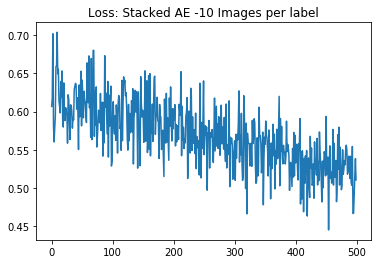

In [31]:
plt.plot(model_loss_10)
plt.title("Loss: Stacked AE -10 Images per label")

# Test Stacked Autoencoder with 10 labels per image

In [61]:
test_model_ae(model1, model2, model3, model4)

Total Accuracy on the Test set: 21.02 %


21.02

# **Create Logistic Regression Model**

In [0]:
class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)
    
    def forward(self, x):
        out = self.linear(x)
        return out

In [0]:
model_lr_10 = LogisticRegression(1024,10)
model_lr_10 = model_lr_10.to(device)
criterion = nn.CrossEntropyLoss();
optimizer = torch.optim.Adam(model_lr_10.parameters(),weight_decay=1e-5,lr=0.001)

# Train classifier layers of Logistic Regression - 10 labels per category

In [64]:
model_lr_loss = []
for epoch in range(500):
  for (images,labels)  in image_data_loader_10:  
    model_lr_10.train() 
    images = images.view(images.size(0), 1024)
    images = images.to(device)
    labels = labels.to(device)
  
    outputs = model_lr_10(images)
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_lr_loss.append(loss.item())
  # ===================log========================
  print('epoch [{}/{}], loss:{:.4f}'.format(epoch+1, 50, loss.item()))

epoch [1/50], loss:2.3494
epoch [2/50], loss:2.2075
epoch [3/50], loss:2.1400
epoch [4/50], loss:2.0344
epoch [5/50], loss:1.9306
epoch [6/50], loss:1.9196
epoch [7/50], loss:1.9441
epoch [8/50], loss:1.7448
epoch [9/50], loss:1.6868
epoch [10/50], loss:1.6752
epoch [11/50], loss:1.7511
epoch [12/50], loss:1.6596
epoch [13/50], loss:1.6016
epoch [14/50], loss:1.5863
epoch [15/50], loss:1.5284
epoch [16/50], loss:1.5178
epoch [17/50], loss:1.4364
epoch [18/50], loss:1.4049
epoch [19/50], loss:1.3986
epoch [20/50], loss:1.4868
epoch [21/50], loss:1.3762
epoch [22/50], loss:1.3526
epoch [23/50], loss:1.3089
epoch [24/50], loss:1.1974
epoch [25/50], loss:1.2871
epoch [26/50], loss:1.2711
epoch [27/50], loss:1.2066
epoch [28/50], loss:1.1367
epoch [29/50], loss:1.2521
epoch [30/50], loss:1.1549
epoch [31/50], loss:1.1445
epoch [32/50], loss:1.2017
epoch [33/50], loss:1.0916
epoch [34/50], loss:1.0322
epoch [35/50], loss:1.0586
epoch [36/50], loss:1.0825
epoch [37/50], loss:0.9808
epoch [38/

# Loss of logistic Regression model trained over 10 images per label

Text(0.5, 1.0, 'Loss: Logistic Regression -10 Images per label')

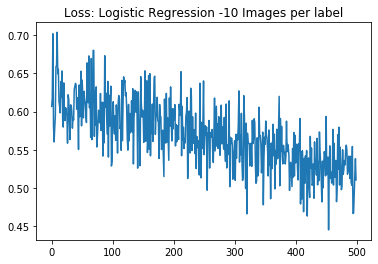

In [41]:
plt.plot(model_loss_10)
plt.title("Loss: Logistic Regression -10 Images per label")

In [0]:
def test_model_lr(model):
  model.eval()
  with torch.no_grad():
    correct = 0.0
    total_samples = 0.0
    for images, labels in test_loader:
      images = images.view(images.size(0), 1024)
      images = images.to(device)
      labels = labels.to(device)
      
      outputs = model(images)
      # outputs = model4(images)
      softmax= nn.Softmax(dim=1)
      outputs = softmax(outputs)
      predicted = torch.argmax(outputs,dim=1)

      ## compare predictions with ground truth for number of correct samples
      correct += (predicted == labels).sum().item()
      total_samples += labels.size(0)
    
  accuracy = (correct/total_samples)*100
  print("Total Accuracy on the Test set: {} %".format(accuracy))
  return accuracy



# Test Logistic Regression with 10 labels per image

In [66]:
test_model_lr(model_lr_10)

Total Accuracy on the Test set: 17.88 %


17.88

# Train classifier layers of Stacked AE - 100 labels per category

In [73]:
model4_100 = Classifier()
model4_100 = model4_100.to(device)
criterion = nn.CrossEntropyLoss();
optimizer = torch.optim.Adam(model4_100.parameters(),weight_decay=1e-5, lr = 0.0001)

model_loss_100 = []
for epoch in range(500):
  for (images,labels)  in image_data_loader_100:
    model1.eval()
    model2.eval()
    model3.eval()
    model4_100.train()    
    images = images.view(images.size(0), 1024)
    images = images.to(device)
    labels = labels.to(device)
    images = model1.encoder1(images)
    images = model2.encoder2(images)
    images = model3.encoder3(images)
    outputs = model4_100(images)
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_loss_100.append(loss.item())
  # ===================log========================
  print('epoch [{}/{}], loss:{:.4f}'.format(epoch+1, 500, loss.item()))

epoch [1/500], loss:2.3109
epoch [2/500], loss:2.3018
epoch [3/500], loss:2.2838
epoch [4/500], loss:2.2388
epoch [5/500], loss:2.2374
epoch [6/500], loss:2.2287
epoch [7/500], loss:2.1833
epoch [8/500], loss:2.1539
epoch [9/500], loss:2.2260
epoch [10/500], loss:2.1502
epoch [11/500], loss:2.1566
epoch [12/500], loss:2.1041
epoch [13/500], loss:2.1724
epoch [14/500], loss:2.1429
epoch [15/500], loss:2.1156
epoch [16/500], loss:2.1152
epoch [17/500], loss:2.0450
epoch [18/500], loss:2.0647
epoch [19/500], loss:2.0951
epoch [20/500], loss:2.0727
epoch [21/500], loss:2.0605
epoch [22/500], loss:2.0497
epoch [23/500], loss:2.0426
epoch [24/500], loss:2.0107
epoch [25/500], loss:1.9845
epoch [26/500], loss:2.0084
epoch [27/500], loss:2.0574
epoch [28/500], loss:1.9258
epoch [29/500], loss:1.8889
epoch [30/500], loss:1.9108
epoch [31/500], loss:1.8447
epoch [32/500], loss:1.9124
epoch [33/500], loss:1.9995
epoch [34/500], loss:1.9060
epoch [35/500], loss:1.8070
epoch [36/500], loss:1.9950
e

# Loss of Stacked Autoencoder model trained over 100 images per label

Text(0.5, 1.0, 'Loss: Stacked Autoencoder -100 Images per label')

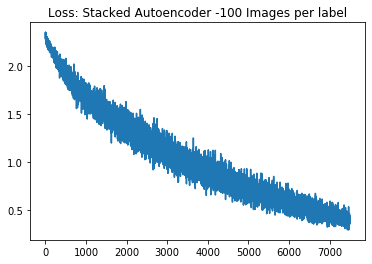

In [74]:
plt.plot(model_loss_100)
plt.title("Loss: Stacked Autoencoder -100 Images per label")

# Test Stacked Autoencoder with 100 labels per image

In [69]:

test_model_ae(model1, model2, model3, model4_100)


Total Accuracy on the Test set: 24.97 %


24.97

# Fine-tune Stacked AE - 100 labels per category

In [75]:
criterion = nn.CrossEntropyLoss();
optimizer = torch.optim.Adam(model4.parameters(),weight_decay=1e-5,lr=0.00001)
# model_loss_100 = []
for epoch in range(100):
  for (images,labels)  in image_data_loader_100:
    model1.train()
    model2.train()
    model3.train()
    model4_100.train()    
    images = images.view(images.size(0), 1024)
    images = images.to(device)
    labels = labels.to(device)
    images = model1.encoder1(images)
    images = model2.encoder2(images)
    images = model3.encoder3(images)
    outputs = model4_100(images)
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # model_loss_100.append(loss.item())
  # ===================log========================
  print('epoch [{}/{}], loss:{:.4f}'.format(epoch+1, 50, loss.item()))

epoch [1/50], loss:0.3241
epoch [2/50], loss:0.3462
epoch [3/50], loss:0.3867
epoch [4/50], loss:0.3591
epoch [5/50], loss:0.4531
epoch [6/50], loss:0.2982
epoch [7/50], loss:0.3764
epoch [8/50], loss:0.4253
epoch [9/50], loss:0.3808
epoch [10/50], loss:0.4212
epoch [11/50], loss:0.5432
epoch [12/50], loss:0.3398
epoch [13/50], loss:0.3946
epoch [14/50], loss:0.3515
epoch [15/50], loss:0.3900
epoch [16/50], loss:0.4739
epoch [17/50], loss:0.4308
epoch [18/50], loss:0.3801
epoch [19/50], loss:0.4744
epoch [20/50], loss:0.3351
epoch [21/50], loss:0.3557
epoch [22/50], loss:0.3464
epoch [23/50], loss:0.3169
epoch [24/50], loss:0.3301
epoch [25/50], loss:0.3383
epoch [26/50], loss:0.3786
epoch [27/50], loss:0.4427
epoch [28/50], loss:0.4421
epoch [29/50], loss:0.3411
epoch [30/50], loss:0.4934
epoch [31/50], loss:0.3858
epoch [32/50], loss:0.4256
epoch [33/50], loss:0.4748
epoch [34/50], loss:0.3285
epoch [35/50], loss:0.3922
epoch [36/50], loss:0.3657
epoch [37/50], loss:0.3924
epoch [38/

In [76]:

test_model_ae(model1, model2, model3, model4_100)

Total Accuracy on the Test set: 25.290000000000003 %


25.290000000000003

# Train classifier layers of Logistic Regression - 100 labels per category

In [78]:
model_lr_100 = LogisticRegression(1024,10)
model_lr_100 = model_lr_100.to(device)
criterion = nn.CrossEntropyLoss();
optimizer = torch.optim.Adam(model_lr_100.parameters(),weight_decay=1e-5,lr=0.001)
model_lr_100_loss =[]
for epoch in range(100):
  model_lr_100.train()
  for (images,labels)  in image_data_loader_100:   
    images = images.view(images.size(0), 1024)
    images = images.to(device)
    labels = labels.to(device)
  
    outputs = model_lr_100(images)
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_lr_100_loss.append(loss.item())
  # ===================log========================
  print('epoch [{}/{}], loss:{:.4f}'.format(epoch+1, 50, loss.item()))

epoch [1/50], loss:2.2041
epoch [2/50], loss:2.0825
epoch [3/50], loss:1.7983
epoch [4/50], loss:2.0635
epoch [5/50], loss:1.9549
epoch [6/50], loss:1.7403
epoch [7/50], loss:1.9260
epoch [8/50], loss:1.8333
epoch [9/50], loss:1.9385
epoch [10/50], loss:1.6668
epoch [11/50], loss:1.7541
epoch [12/50], loss:1.8081
epoch [13/50], loss:1.6162
epoch [14/50], loss:1.7652
epoch [15/50], loss:1.6365
epoch [16/50], loss:1.6473
epoch [17/50], loss:1.8209
epoch [18/50], loss:1.6902
epoch [19/50], loss:1.5471
epoch [20/50], loss:1.6095
epoch [21/50], loss:1.4626
epoch [22/50], loss:1.5479
epoch [23/50], loss:1.5158
epoch [24/50], loss:1.6026
epoch [25/50], loss:1.5229
epoch [26/50], loss:1.3676
epoch [27/50], loss:1.4655
epoch [28/50], loss:1.4594
epoch [29/50], loss:1.4960
epoch [30/50], loss:1.5942
epoch [31/50], loss:1.3529
epoch [32/50], loss:1.3655
epoch [33/50], loss:1.5040
epoch [34/50], loss:1.2983
epoch [35/50], loss:1.2325
epoch [36/50], loss:1.3059
epoch [37/50], loss:1.3661
epoch [38/

# Test logistic Regression - 100 images

In [79]:
test_model_lr(model_lr_100)

Total Accuracy on the Test set: 20.810000000000002 %


20.810000000000002

# Loss of logistic Regression model trained over 100 images per label

Text(0.5, 1.0, 'Loss: Logistic Regression -100 Images per label')

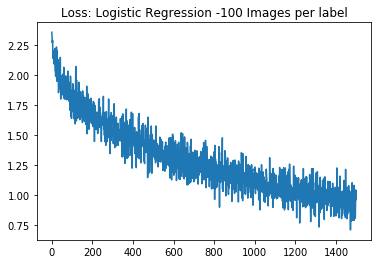

In [80]:
plt.plot(model_lr_100_loss)
plt.title("Loss: Logistic Regression -100 Images per label")